In [4]:
# Package imports 
import matplotlib.pyplot as plt 
import numpy as np 
import sklearn 
import sklearn.datasets 
import sklearn.linear_model 
import matplotlib 
 
# Display plots inline and change default figure size 
%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [6]:
!ls '../../Data/Dataframe/full/'

b5post.csv	 brmoral.csv	      esic.csv	   esic_v4.csv
brblogset.csv	 enblogs.csv	      esic_v2.csv  pan13_test.csv
BRmoral-433.csv  e-sic-CA-rafael.csv  esic_v3.csv  smsCorpus.csv


In [50]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords

import pandas as pd
df = pd.read_csv('../../Data/Dataframe/full/b5post.csv')
df.head()

df2 = df[~pd.isnull(df.age)]
print(len(df), len(df2))

text = df2.text.values
y = df2.age.values

vect = TfidfVectorizer(lowercase=True,analyzer='word', smooth_idf=True, max_features=None, stop_words=set(stopwords.words('portuguese')))
X = vect.fit_transform(text).toarray()

from sklearn import preprocessing

def labelEncoder(y):
    le = LabelEncoder()
    le.fit(y)

    # print('>> classes', list(le.classes_))

    return (le.transform(y), len(le.classes_), le.classes_)

y, n_classes, c = labelEncoder(y)

1020 517


(517, 58470) (517,)
(517, 58470) (517,)


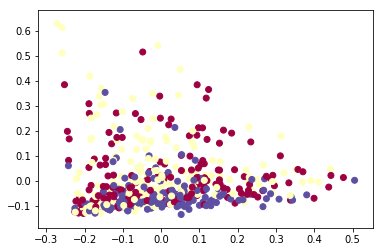

In [51]:
print(X.shape, y.shape)

from sklearn.decomposition import PCA

pca = PCA(n_components=4)

X_pca = pca.fit_transform(X)

print(X.shape, y.shape)

# Generate a dataset and plot it
np.random.seed(0)
#X, y = datasets.make_moons(200, noise=0.20)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.Spectral) 

In [71]:
def plot_decision_boundary(pred_func): 
    # Set min and max values and give it some padding 
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5 
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5 
    h = 0.01
    
    print(x_min, x_max, h)
    # Generate a grid of points with distance h between them 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) 
    print(xx.shape, yy.shape, xx.ravel().shape, yy.ravel().shape)
    # Predict the function value for the whole gid 
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    print(Z.shape)
    Z = Z.reshape(Z.shape[0], 1)
    # Plot the contour and training examples 
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

-0.7716857671746755 1.005305428042675 0.01
(177, 178) (177, 178) (31506,) (31506,)
(517,)


TypeError: Shape of x does not match that of z: found (177, 178) instead of (517, 1).

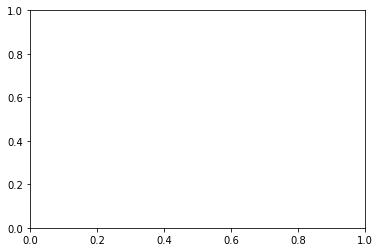

In [70]:
X = X_pca
y = y


# Train the logistic rgeression classifier
clf = sklearn.linear_model.LogisticRegressionCV(cv=3, max_iter=120, solver='liblinear', multi_class='auto')
clf.fit(X, y)
 
# %% 12 
# Plot the decision boundary 
plot_decision_boundary(lambda x: clf.predict(X)) 
plt.title("Logistic Regression")